<a href="https://colab.research.google.com/github/hopefulhazel/programacion/blob/master/minst1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the digits

In [1]:
print('try')

try


In [2]:
!pip install -q keras

import keras


Using TensorFlow backend.


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function



import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import plot_model

def _check_pydot():
    try:
        # Attempt to create an image of a blank graph
        # to check the pydot/graphviz installation.
        pydot.Dot.create(pydot.Dot())
    except Exception:
        # pydot raises a generic Exception here,
        # so no specific class can be caught.
        raise ImportError('Failed to import pydot. You must install pydot'
                          ' and graphviz for `pydotprint` to work.')

@property
def layers(self):
    # Historically, `sequential.layers` only returns layers that were added
    # via `add`, and omits the auto-generated `InputLayer`
    # that comes at the bottom of the stack.
    if self._layers and isinstance(self._layers[0], InputLayer):
        return self._layers[1:]
    return self._layers
  


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

count the number of unique train labels

In [5]:
unique, counts = np.unique(y_train, return_counts = True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


count the number of unique test labels

In [6]:
unique, counts = np.unique(y_test, return_counts = True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [0]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

choose a 5x5= 25 random numbers/digits from the list

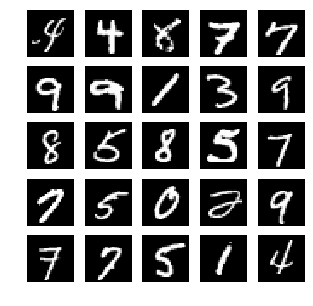

In [8]:
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5, i+1)
    image = images[i]
    plt.imshow(image, cmap= 'gray')
    plt.axis('off')
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

# Classifying the digits

*MLP fully connected network*

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [0]:
num_labels = len(np.unique(y_train))

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [0]:
image_size = x_train.shape[1]
input_size = image_size * image_size

resize and normalize


In [0]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255


network parameters

In [0]:
batch_size = 128
hidden_units = 256
dropout = 0.45

3-layer MLP with ReLU and dropout after each layer

In [15]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

W0627 08:53:39.883226 139647679649664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 08:53:39.904662 139647679649664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 08:53:39.908128 139647679649664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 08:53:39.928492 139647679649664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0627 08:53:39.940563 

In [16]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


W0627 08:53:40.018641 139647679649664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0627 08:53:40.057034 139647679649664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

In [0]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

train the network

In [18]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


W0627 08:53:40.300831 139647679649664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.4361 - acc: 0.8653
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1984 - acc: 0.9411
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1533 - acc: 0.9538
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1300 - acc: 0.9603
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1150 - acc: 0.9648
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0997 - acc: 0.9687
Epoch 7/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0967 - acc: 0.9707
Epoch 8/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0881 - acc: 0.9730
Epoch 9/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0821 - acc: 0.9742
Epoch 10/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0793 - acc: 0.9755

***Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.***

***batch size parameter: is the sample size of the number of inputs to process at each training step ***


loss: we want to minimize it. if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output


accuracy: is the percent of correct predictions based on ground truth

validate the model on test dataset to determine generalization


In [19]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

10000/10000 [==============================] - 0s 22us/step


In [20]:
print("\n Test accuracy: %.1f%%" % (100.0 * acc))


 Test accuracy: 98.3%


In [21]:
loss


0.06608602294450976